Populating the interactive namespace from numpy and matplotlib


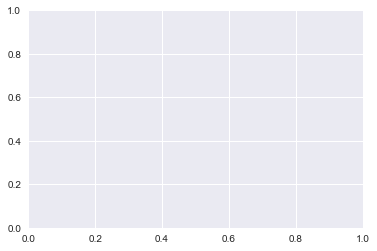

In [2]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from IPython.core.magic import register_cell_magic
import pandas as pd
import numpy as np
plt.ticklabel_format(style='plain', axis='y')

In [3]:
bechdelDataset = pd.read_csv('mergeWithRevenue.csv', encoding='latin-1') 
bechdelDataset.head(10)

,Unnamed: 0,id,imdb_id,Rating,Title,Year,Unnamed: 0_y,color,director_name,num_critic_for_reviews,...,parental_rating,production_company,adjusted_box_office,Multigenre,director_name%,writer%,producer%,director_gender,producer_gender,writer_gender
0,0,5433,3.0,0,Pauvre Pierrot,1892,NaN,NaN,«_mile Reynaud,0,...,NaN,NaN,0.0,Y,0.000000,0.0,0.000000,M,M,M
1,1,5444,14.0,0,Tables Turned on the Gardener,1895,NaN,NaN,Louis Lumi«_re,0,...,NaN,NaN,0.0,Y,0.000000,0.0,0.000000,M,M,M
2,2,6200,132134.0,0,"Execution of Mary, Queen of Scots, The",1895,NaN,NaN,Alfred Clark,0,...,NaN,NaN,0.0,Y,0.000000,0.0,0.000000,M,M,M
3,3,6199,12.0,0,"Arrival of a Train, The",1896,NaN,NaN,Auguste Lumi«_re,0,...,NaN,NaN,0.0,Y,0.000000,0.0,0.000000,M,M,M
4,4,5406,131.0,0,Une nuit terrible,1896,NaN,NaN,Georges M««©li«_s,0,...,NaN,NaN,0.0,Y,0.032258,0.0,0.058824,M,M,M
5,5,4982,91.0,0,"House of the Devil, The",1896,NaN,NaN,Georges M««©li«_s,0,...,NaN,NaN,0.0,Y,0.032258,0.0,0.058824,M,M,M
6,6,5445,223341.0,0,La fee aux choux,1896,NaN,NaN,Alice Guy,0,...,NaN,NaN,0.0,Y,0.000000,0.0,0.000000,F,M,F
7,7,5411,224240.0,0,"Temptation of St. Anthony, The",1898,NaN,NaN,Georges M««©li«_s,0,...,NaN,NaN,0.0,Y,0.032258,0.0,0.000000,M,M,M
8,8,5410,211.0,0,"Astronomer&#39;s Dream; or, The Man in the Moo...",1898,NaN,NaN,Georges M««©li«_s,0,...,NaN,Kadokawa Pictures,0.0,Y,0.032258,0.0,0.058824,M,M,M
9,9,4978,135696.0,0,Four Heads Are Better Than One,1898,NaN,NaN,Georges M««©li«_s,0,...,NaN,NaN,0.0,Y,0.032258,0.0,0.058824,M,M,M


In [4]:
#use this to construct pass percentages for each director/writer/producer 
#over their work in the dataset
from collections import defaultdict

def returnValue(x, counter):
    if (pd.notnull(x)):
       return counter[x]
    else:
       return 0.0

def constructRecord(dataset, role):
    columnName = role
    passValues = dataset[dataset.binary == 'PASS'][columnName].value_counts().to_dict()
    totalValues = dataset[columnName].value_counts().to_dict()
    passDict = defaultdict(float)
    for value in passValues:
        passDict[value] = passValues[value] / totalValues[value]
           
    dataset[columnName+'%'] = dataset[columnName].apply(lambda x: returnValue(x, passDict))  
    return dataset


In [ ]:
bechdelDataset = constructRecord(bechdelDataset, 'director_name')
bechdelDataset = constructRecord(bechdelDataset, 'writer')
bechdelDataset = constructRecord(bechdelDataset, 'producer')

In [ ]:
bechdelDataset.head(40)

In [ ]:
names = bechdelDataset['producer'].unique()
producerFirstNames = []
for name in names:
    if (pd.notnull(name)):
        first = name.split(' ')
        producerFirstNames.append(first[0])
        
#sorted ensures we don't lose our place
producerGivenNamesSet = sorted(list(set(producerFirstNames)))

In [ ]:
names = bechdelDataset['writer'].unique()
writerFirstNames = []
for name in names:
    if (pd.notnull(name)):
        first = name.split(' ')
        writerFirstNames.append(first[0])
        
writerGivenNamesSet = sorted(set(writerFirstNames))

In [ ]:
names = bechdelDataset['director_name'].unique()
directorNames = []
for name in names:
    if (pd.notnull(name)):
        first = name.split(' ')
        directorNames.append(first[0])
        
directorGivenNamesSet = sorted(set(directorNames))
print(len(directorGivenNamesSet))

In [ ]:
bechdelDataset['director_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])
bechdelDataset['producer_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])
bechdelDataset['writer_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])

In [ ]:
bechdelDataset.head(10)

In [5]:
import requests
import json
import xmltodict

def requestGender(name, key):
     print(name)
     paramDict = {'name': name, 'key': key}
     response = requests.get('https://www.behindthename.com/api/lookup.php', paramDict)
     fileStr = {}
     if (response != None and response.status_code == 200):
        fileDict = xmltodict.parse(response.text)
        print(fileDict)
        if ('response' in fileDict.keys() and 'name_detail' in fileDict['response'].keys()):
           nameDetail = fileDict['response']['name_detail'] 
           if (type(nameDetail) is list):
               gender = fileDict['response']['name_detail'][0]['gender']      
           else:     
               gender = fileDict['response']['name_detail']['gender']
           print("success")
           return gender.upper()
     else:
        return "MFail"
     return "M"    

In [ ]:
requestGender("Christopher")

In [ ]:
from collections import defaultdict

namesValues = defaultdict(str)
for i in range(1285, len(producerGivenNamesSet)):
    print(i)
    name = producerGivenNamesSet[i]
    gender = requestGender(name)
    if (gender == "MFail"):
        break
    namesValues[producerGivenNamesSet[i]] = gender

In [ ]:
#namesDF = pd.DataFrame({"names": namesValues.keys(), "gender": namesValues.keys()})
#namesDF = pd.DataFrame(namesValues, index=[i for i in range(len(namesValues))])
#save dataframe to pandas for later, 1285
#namesDF.to_csv('nameGenders.csv')
values = []
for colum in namesDF.columns.values[0:1285]:
    value = namesDF.iloc[0][colum]
    if (len(value) == 2):
        value = value[0]
    values.append(value)    
oldNamesDict = pd.DataFrame({"names": namesDF.columns.values[0:1285], "values": values})
oldNamesDict 

In [ ]:
values = []
for colum in namesValues.keys():
    value = namesValues[colum]
    if (len(value) == 2):
        value = value[0]
    values.append(value) 

newNamesDict = pd.DataFrame(data={"names": list(namesValues.keys()), "values": values}, index=[i for i in range(1285, 1792)])
frames = [oldNamesDict, newNamesDict]
result = pd.concat(frames)

In [ ]:
result.to_csv('nameGenders.csv', encoding='latin-1')

In [ ]:
namesValues = defaultdict(str)
for i in range(1372, len(writerGivenNamesSet)):
    print(i)
    name = writerGivenNamesSet[i]
    gender = requestGender(name, 'co403533')
    if (gender == "MFail"):
        break
    namesValues[writerGivenNamesSet[i]] = gender

In [ ]:
values = []
for colum in namesValues.keys():
    value = namesValues[colum]
    if (len(value) == 2):
        value = value[0]
    values.append(value) 

newNamesDict = pd.DataFrame(data={"names": list(namesValues.keys()), "values": values}, index=[i for i in range(1372, 1372 + len(namesValues))])
newNamesDict.to_csv('writerNamesGenderTwo.csv', encoding='latin-1')

In [ ]:
namesValues = defaultdict(str)
for i in range(881, len(directorGivenNamesSet)):
    print(i)
    name = directorGivenNamesSet[i]
    gender = requestGender(name, 'ma042492')
    if (gender == "MFail"):
        break
    namesValues[directorGivenNamesSet[i]] = gender

In [ ]:
values = []
for colum in namesValues.keys():
    value = namesValues[colum]
    if (len(value) == 2):
        value = value[0]
    values.append(value) 

newNamesDict = pd.DataFrame(data={"names": list(namesValues.keys()), "values": values}, index=[i for i in range(881, 881 + len(namesValues))])
newNamesDict.to_csv('directorNamesGenderTwo.csv', encoding='latin-1')

In [ ]:
directorNames = pd.read_csv('directorNamesGender.csv', encoding='latin-1')
writerNames = pd.read_csv('writerNamesGender.csv', encoding='latin-1')
producerNames = pd.read_csv('nameGenders.csv', encoding='latin-1')

In [ ]:
bechdelDataset['director_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])
bechdelDataset['producer_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])
bechdelDataset['writer_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])

In [ ]:
directorDict = defaultdict(str)
for i in range(len(directorNames)):
    firstName = directorNames.iloc[i]['names']
    gender = directorNames.iloc[i]['values']
    directorDict[firstName] = gender
        
writerDict = defaultdict(str)    
for i in range(len(writerNames)):
    firstName = writerNames.iloc[i]['names']
    gender = writerNames.iloc[i]['values']
    writerDict[firstName] = gender
    
producerDict = defaultdict(str)    
for i in range(len(producerNames)):
    firstName = producerNames.iloc[i]['names']
    gender = producerNames.iloc[i]['values']
    producerDict[firstName] = gender    

In [ ]:
for i in range(len(bechdelDataset)):
    name = bechdelDataset.iloc[i]['director_name']
    if (pd.notnull(name)):
       firstName = name.split(' ')[0]
       bechdelDataset.set_value(i, 'director_gender', directorDict[firstName])
    else:     
        bechdelDataset.set_value(i, 'director_gender', 'M')

In [ ]:
for i in range(len(bechdelDataset)):
    name = bechdelDataset.iloc[i]['producer']
    if (pd.notnull(name)):
       firstName = name.split(' ')[0]
       bechdelDataset.set_value(i, 'producer_gender', producerDict[firstName])
    else:     
        bechdelDataset.set_value(i, 'producer_gender', 'M')

In [ ]:
for i in range(len(bechdelDataset)):
    name = bechdelDataset.iloc[i]['writer']
    if (pd.notnull(name)):
       firstName = name.split(' ')[0]
       bechdelDataset.set_value(i, 'writer_gender', directorDict[firstName])
    else:     
        bechdelDataset.set_value(i, 'writer_gender', 'M')

In [ ]:
bechdelDataset.to_csv('mergeWithRevenue.csv', encoding='latin-1')

In [ ]:
bechdelDataset.head()

In [6]:
bechdelDataset['color'] = bechdelDataset['color'].fillna('')
bechdelDataset['director_name'] = bechdelDataset['director_name'].fillna('')
bechdelDataset['num_critic_for_reviews'] = bechdelDataset['num_critic_for_reviews'].fillna(0)
bechdelDataset['director_facebook_likes'] = bechdelDataset['director_facebook_likes'].fillna(0)
bechdelDataset['actor_3_facebook_likes'] = bechdelDataset['actor_3_facebook_likes'].fillna(0)
bechdelDataset['actor_2_name'] = bechdelDataset['actor_2_name'].fillna('')
bechdelDataset['actor_1_facebook_likes'] = bechdelDataset['actor_1_facebook_likes'].fillna(0)
bechdelDataset['actor_1_name'] = bechdelDataset['actor_1_name'].fillna('')
bechdelDataset['num_voted_users'] = bechdelDataset['num_voted_users'].fillna(0)
bechdelDataset['cast_total_facebook_likes'] = bechdelDataset['cast_total_facebook_likes'].fillna('')
bechdelDataset['actor_3_name'] = bechdelDataset['actor_3_name'].fillna('')
bechdelDataset['facenumber_in_poster'] = bechdelDataset['facenumber_in_poster'].fillna(0)
bechdelDataset['plot_keywords'] = bechdelDataset['plot_keywords'].fillna('')
bechdelDataset['movie_imdb_link'] = bechdelDataset['movie_imdb_link'].fillna('')
bechdelDataset['num_user_for_reviews'] = bechdelDataset['num_user_for_reviews'].fillna(0)
bechdelDataset['content_rating'] = bechdelDataset['content_rating'].fillna('')
bechdelDataset['actor_2_facebook_likes'] = bechdelDataset['actor_2_facebook_likes'].fillna(0)
bechdelDataset['aspect_ratio'] = bechdelDataset['aspect_ratio'].fillna(0)
bechdelDataset['movie_facebook_likes'] = bechdelDataset['movie_facebook_likes'].fillna(0)
bechdelDataset['writer'] = bechdelDataset['writer'].fillna('')
bechdelDataset['box_office'] = bechdelDataset['box_office'].fillna(0)
bechdelDataset['parental_rating'] = bechdelDataset['parental_rating'].fillna('')
bechdelDataset['production_company'] = bechdelDataset['production_company'].fillna('')
bechdelDataset['director_gender'] = bechdelDataset['director_gender'].fillna('M')
bechdelDataset['producer_gender'] = bechdelDataset['producer_gender'].fillna('M')
bechdelDataset['writer_gender'] = bechdelDataset['writer_gender'].fillna('M')

In [19]:
bechdelDataset['imdb_score'] = bechdelDataset['imdb_score'].fillna(0)
for i in range(len(bechdelDataset)):
    if (bechdelDataset.iloc[i]['binary'] == 'PASS'):
       bechdelDataset.set_value(i, 'binary', 1)
    else:
       bechdelDataset.set_value(i, 'binary', 0) 
bechdelDataset.to_csv('mergeWithRevenue.csv', encoding='latin-1')

In [20]:
#base accuracy for original file
import catboost
from operator import itemgetter
from catboost import Pool
from sklearn.model_selection import train_test_split

meeting = pd.read_csv('mergeWithRevenue.csv', encoding='latin-1')
meeting = meeting.fillna('')
test_size = .2

train, test = train_test_split(meeting, test_size=test_size)

colNames = [col for col in meeting.columns.values if col not in ['Title', 'Year', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'imdb_id', 'Rating', 'Unnamed: 0_y', 'binary', 'domgross',	'intgross',	'budget_2013$','domgross_2013$','intgross_2013$','box_office','adjusted_box_office','test','clean_test']]
a = 0
for col in colNames:
    a += 1

X_train, y_train = train[colNames], train['binary']
model = catboost.CatBoostClassifier(iterations=16, learning_rate=1, depth=12, l2_leaf_reg=5, calc_feature_importance=True, loss_function='Logloss')

i = 0
cat_features = []
for col in colNames:
    if (meeting[col].dtype == 'object' and (col != 'imdb_score' or col != 'budget' or col != gross)):
       cat_features.append(i)
    i += 1
       

trainPool = Pool(X_train, y_train, cat_features)
model.fit(trainPool)
X_test, y_t = test[colNames], test['binary']
testPool = Pool(X_test, y_t, cat_features)
preds  = model.predict(testPool)

importances = model.feature_importances_
colList = [(colNames[i], importances[i]) for i in range(len(colNames))]
importanceMatrix = sorted(colList, key=itemgetter(1))

In [21]:
from sklearn.metrics import accuracy_score

print(preds)
print(len(preds))
accuracy = accuracy_score(y_t, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


[ 1.  0.  1. ...,  1.  0.  0.]
1490
Accuracy: 96.78%


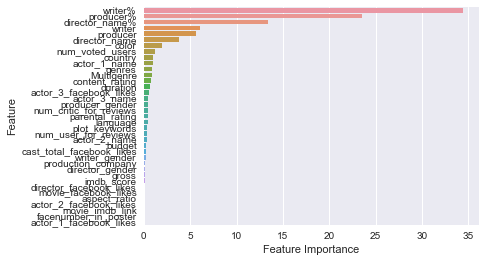

In [23]:
barX = [val[0] for val in importanceMatrix]
barY = [val[1] for val in importanceMatrix]

barX.reverse()
barY.reverse()

ax = sns.barplot(x=barY, y=barX, orient="h") 
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Feature")

Normalized confusion matrix
[[ 0.95673077  0.04326923]
 [ 0.02424942  0.97575058]]


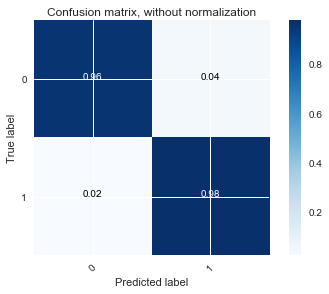

In [24]:
from sklearn.metrics import confusion_matrix

theMatrix = confusion_matrix(y_t, preds)
plot_confusion_matrix(theMatrix, classes=['0', '1'], normalize=True, title='Confusion matrix, without normalization')

In [ ]:
#We have a really good classifier, and it seems the writer's past record is the most
#important part of a writer's task.

In [25]:
#Multiclass Regression
def getAccuracy(nIter, depth, lr, l2reg, multiLoss='MultiClass'):
    meeting = pd.read_csv('mergeWithRevenue.csv', encoding='latin-1')
    meeting = meeting.fillna('')
    test_size = .2

    train, test = train_test_split(meeting, test_size=test_size)

    colNames = [col for col in meeting.columns.values if col not in ['Title', 'Year', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'imdb_id', 'Rating', 'Unnamed: 0_y', 'binary', 'domgross',	'intgross',	'budget_2013$','domgross_2013$','intgross_2013$','box_office','adjusted_box_office','test','clean_test']]
    a = 0
    for col in colNames:
        a += 1

    X_train, y_train = train[colNames], train['Rating']
    model = catboost.CatBoostClassifier(iterations=nIter, learning_rate=lr, depth=depth, l2_leaf_reg=l2reg, calc_feature_importance=True, loss_function=multiLoss)

    cat_features = []
    i = 0
    for col in colNames:
        if (meeting[col].dtype == 'object' and col != 'imdb_score'):
           cat_features.append(i)
        i += 1

    trainPool = Pool(X_train, y_train, cat_features)
    model.fit(trainPool)

    X_test, y_test = test[colNames], test['Rating']
    testPool = Pool(X_test, y_test, cat_features)
    preds_class  = model.predict(testPool)

    importances = model.feature_importances_
    colList = [(colNames[i], importances[i]) for i in range(len(colNames))]
    theCols = sorted(colList, key=itemgetter(1))
    accuracy = accuracy_score(y_test, preds_class)
    
    return theCols, accuracy, y_test, preds_class


In [26]:
#lets tune iterations first
from sklearn.metrics import accuracy_score

for numIter in range(10, 20):
    accuracySum = 0.0
    for a in range(0, 5):
        accuracySum += getAccuracy(numIter, 5, 2, 1)[1]
        
    accuracy = accuracySum/5.0    
    print ("Num iterations %d: Accuracy: %.2f%%" % (numIter, accuracy * 100.0))    


Num iterations 10: Accuracy: 67.74%


KeyboardInterrupt: 

In [ ]:
#lets pick 16

In [ ]:
#now lets tune depth
from sklearn.metrics import accuracy_score

for depth in range(5, 13, 1):
    accuracySum = 0.0
    for a in range(0, 5):
        accuracySum += getAccuracy(16, depth, 2, 1)[1]
        
    accuracy = accuracySum/5.0    
    print ("Depth %d: Accuracy: %.2f%%" % (depth, accuracy * 100.0))    

In [ ]:
#lets pick 8 since the depth causes the training time to rise significantly
#and we dont get any significant boost in accuracy from high depths

In [ ]:
#now we can tune the learning rate
from sklearn.metrics import accuracy_score

lr = 0.0
while lr <= 1.2:
    accuracySum = 0.0
    for a in range(0, 5):
        accuracySum += getAccuracy(16, 8, lr, 1)[1]
        
    accuracy = accuracySum/5.0    
    print ("Learning rate %d: Accuracy: %.2f%%" % (lr, accuracy * 100.0)) 
    lr += 0.2

In [ ]:
#The learning rate is very important to tune and get right. LR here is .4, 
#indicating a small one is needed for very good accuracy.

In [ ]:
#and finally lets tune the l2 reg
from sklearn.metrics import accuracy_score

for l2reg in range(1, 10):
    accuracySum = 0.0
    for a in range(0, 5):
        accuracySum += getAccuracy(16, 8, .4, l2reg)[1]
        
    accuracy = accuracySum/5.0    
    print ("L2 Reg %d: Accuracy: %.2f%%" % (l2reg, accuracy * 100.0))    

In [ ]:
#and also the loss function we use
from sklearn.metrics import accuracy_score

accuracySum = 0.0
for a in range(0, 5):
    accuracySum += getAccuracy(16, 8, .4, 4)[1]
        
    accuracy = accuracySum/5.0    
    print ("Multiclass: Accuracy: %.2f%%" % (accuracy * 100.0))   
    
accuracySum = 0.0
for a in range(0, 5):
    accuracySum += getAccuracy(16, 8, .4, 4, 'MultiClassOneVsAll')[1]
        
    accuracy = accuracySum/5.0    
    print ("Multiclass OnevAll: Accuracy: %.2f%%" % (accuracy * 100.0))       

In [ ]:
#since there is no real difference, we'll stick with the Multiclass indicator as
#the default.

In [26]:
#lets print out importance and a confusion matrix.
#And other stuff
importanceMatrix, accuracy, y_test, preds = getAccuracy(16, 8, .4, 4)
print("Multiclass: Accuracy: %.2f%%" % (accuracy * 100.0))
print(importanceMatrix)

Multiclass: Accuracy: 77.65%
[('num_critic_for_reviews', 0.0), ('director_facebook_likes', 0.0), ('actor_3_facebook_likes', 0.0), ('actor_1_facebook_likes', 0.0), ('num_voted_users', 0.0), ('facenumber_in_poster', 0.0), ('num_user_for_reviews', 0.0), ('actor_2_facebook_likes', 0.0), ('imdb_score', 0.0), ('aspect_ratio', 0.0), ('movie_facebook_likes', 0.0), ('director_gender', 0.0), ('parental_rating', 0.000983435398881173), ('actor_1_name', 0.0013518351903716733), ('budget', 0.01795017435181552), ('country', 0.07486864181565986), ('producer_gender', 0.08151492564075344), ('production_company', 0.08826574405316484), ('movie_imdb_link', 0.09020260176115794), ('Multigenre', 0.12848651480806647), ('writer_gender', 0.19445990286158002), ('cast_total_facebook_likes', 0.3251086441828073), ('language', 0.33588462666578595), ('content_rating', 0.3526929924421226), ('actor_3_name', 0.3652121551748158), ('color', 0.47612825972798295), ('actor_2_name', 0.5490259468098865), ('gross', 0.623195398681

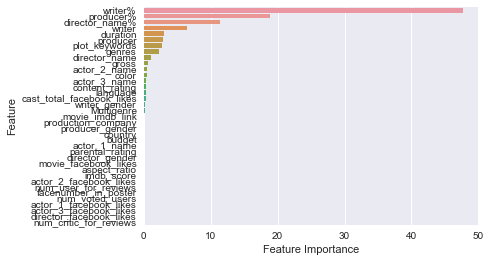

In [27]:
#bar graph importance matrix
barX = [val[0] for val in importanceMatrix]
barY = [val[1] for val in importanceMatrix]

barX.reverse()
barY.reverse()

ax = sns.barplot(x=barY, y=barX, orient="h") 
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Feature")

In [ ]:
#Looks like the percentages we used were the most important features for the trees we used in classification.

In [28]:
from sklearn.metrics import confusion_matrix

theMatrix = confusion_matrix(y_test, preds)
print(theMatrix)

[[ 29 114   0  10]
 [ 13 279   0  29]
 [  3 134   0  15]
 [  3  12   0 849]]


In [15]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[ 0.18954248  0.74509804  0.          0.06535948]
 [ 0.04049844  0.86915888  0.          0.09034268]
 [ 0.01973684  0.88157895  0.          0.09868421]
 [ 0.00347222  0.01388889  0.          0.98263889]]


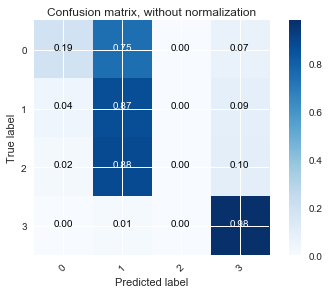

In [29]:
plot_confusion_matrix(theMatrix, classes=['0', '1','2','3'], normalize=True, title='Confusion matrix, without normalization')

In [ ]:
#Really good at detecting 1s and 3s here, with either no talking women or the true label.

In [30]:
#Binary classification problem: is 100% accuracy due to prevalence of FAILS. Its easy to predict 0s.
#Rating accuracy is much lower. This is a much harder problem to get right.
#Lets look at original bechdel dataset
bechdelClean = pd.read_csv('bechdel_clean.csv')
ids = []
for imdb_id in bechdelClean.imdb_id.values:
    ids.append(imdb_id)
     
reducedDataset = bechdelDataset[bechdelDataset.imdb_id.isin(ids)]
print(reducedDataset)

FileNotFoundError: File b'bechdel_clean.csv' does not exist

In [31]:
train, test = train_test_split(reducedDataset, test_size=test_size)

reducedDataset = reducedDataset.fillna('')
colNames = [col for col in reducedDataset.columns.values if col not in ['Unnamed: 0.1', 'Unnamed: 0', 'id', 'imdb_id', 'Rating', 'test', 'clean_test', 'Unnamed: 0_y', 'binary', 'domgross',	'intgross',	'budget_2013$','domgross_2013$','intgross_2013$','box_office','adjusted_box_office']]
a = 0
for col in colNames:
    a += 1

X_train, y_train = train[colNames], train['Rating']
model = catboost.CatBoostClassifier(iterations=2, learning_rate=1, depth=2, loss_function='Logloss')

cat_features = []
i = 0
for col in colNames:
    if (reducedDataset[col].dtype == 'object' and col != 'imdb_score'):
       cat_features.append(i)
    i += 1

trainPool = Pool(X_train, y_train, cat_features)
model.fit(trainPool)
print(model)

X_test, y_test = test[colNames], test['Rating']
print(y_test.values)
print(len(y_test))
testPool = Pool(X_test, y_test, cat_features)
preds_class  = model.predict(testPool)


NameError: name 'reducedDataset' is not defined

In [32]:
from sklearn.metrics import accuracy_score

print(preds_class)
print(len(preds_class))
accuracy = accuracy_score(y_test, preds_class)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


[ 1.  1.  0. ...,  1.  1.  0.]
1490
Accuracy: 16.04%


In [33]:
#Boosting does very well for both types of classifiers. Now lets do revenue analysis for post 1990 
#American films. This will let us see how the Bechdel test affects revenue.
reducedSet = bechdelDataset[bechdelDataset.country == 'USA']
revenueHollywoodDataset = reducedSet[reducedSet.Year > 1989]
revenueHollywoodDataset.columns.values

array(['Unnamed: 0', 'id', 'imdb_id', 'Rating', 'Title', 'Year',
       'Unnamed: 0_y', 'color', 'director_name', 'num_critic_for_reviews',
       'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'binary', 'test',
       'clean_test', 'domgross', 'intgross', 'budget_2013$',
       'domgross_2013$', 'intgross_2013$', 'producer', 'writer',
       'box_office', 'parental_rating', 'production_company',
       'adjusted_box_office', 'Multigenre', 'director_name%', 'writer%',
       'producer%', 'director_gender', 'producer_gender', 'writer_gender'], dtype=object)

In [34]:
passHollywood = revenueHollywoodDataset[revenueHollywoodDataset.binary == 1]
failHollywood = revenueHollywoodDataset[revenueHollywoodDataset.binary == 0]

204668208.47087815
239472432.6165006


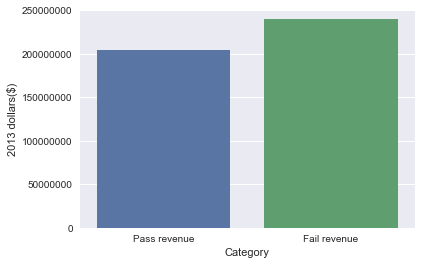

In [35]:
meanPassValue = 0.0
meanPassLen = 0.0
meanFailValue = 0.0
meanFailLen = 0.0
meanPasses = []
meanFails = []

for revenue in passHollywood.adjusted_box_office.values:
    if (int(revenue) != 0):
       meanPasses.append(revenue)

meanPassValue = pd.Series(meanPasses).mean()
meanPassStd = pd.Series(meanPasses).std()    
for revenue in failHollywood.adjusted_box_office.values:
    if (int(revenue) != 0):
        meanFails.append(revenue)  
        
meanFailValue = pd.Series(meanFails).mean()     
meanFailStd = pd.Series(meanFails).std() 

print(meanPassValue)
print(meanFailValue)
    
ax = sns.barplot(x=["Pass revenue", "Fail revenue"], y=[meanPassValue, meanFailValue], orient="v") 
ax.set_ylim(0, 250000000)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.set_xlabel('Category')

319198088.28884685
306666574.88085055


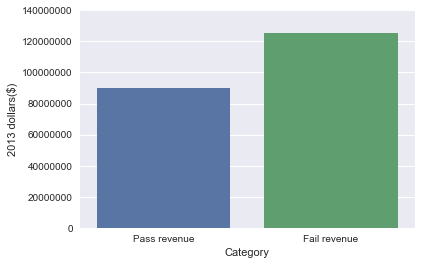

In [36]:
medianPassValue = 0.0
medianPassLen = 0.0
medianFailValue = 0.0
medianFailLen = 0.0
medianPasses = []
medianFails = []

for revenue in passHollywood.adjusted_box_office.values:
    if (int(revenue) != 0):
       medianPasses.append(revenue)

medianPassValue = pd.Series(medianPasses).median()
medianPassStd = pd.Series(medianPasses).std()    
for revenue in failHollywood.adjusted_box_office.values:
    if (int(revenue) != 0):
        medianFails.append(revenue)  
        
medianFailValue = pd.Series(medianFails).median()        
medianFailStd = pd.Series(medianFails).std() 

print(medianPassStd)
print(medianFailStd)
    
ax = sns.barplot(x=["Pass revenue", "Fail revenue"], y=[medianPassValue, medianFailValue], orient="v") 
ax.set_ylim(0, 140000000)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.set_xlabel('Category')

In [60]:
#There is a significant difference between medians. Lets look by genre

In [37]:
#Cohen's d and percent variation
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / numpy.sqrt(pooled_var)
    return d

print(CohenEffectSize(pd.Series(meanFails), pd.Series(meanPasses)))

0.110848102027


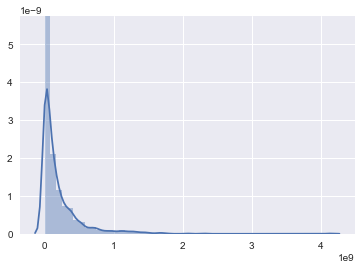

In [42]:
sns.distplot(meanPasses)

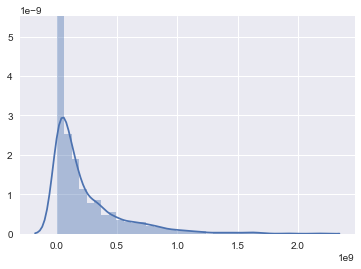

In [41]:
sns.distplot(meanFails)

In [ ]:
#this matches our observation of a low cohen's D with much overlap

In [43]:
coedTuples = zip(medianPasses, medianFails)
numTotal = 0.0
for pair in coedTuples:
    if (pair[0] > pair[1]):
        numTotal += 1.0

print(numTotal/len(medianPasses))

0.340036563071298


In [94]:
#reset indices to enable us to loop correctly over both with iloc
passHollywood = passHollywood.reset_index()
failHollywood = failHollywood.reset_index()

ValueError: cannot insert level_0, already exists

In [95]:
from collections import defaultdict
genreDict = defaultdict(list)
genres = list(passHollywood['genres'].values)
failGenres = list(failHollywood['genres'].values)

#passHollywood = passHollywood.reset_index()
#failHollywood = failHollywood.reset_index()

passGenreDict = defaultdict(list)
for a in range(len(passHollywood)):
    if (type(passHollywood.iloc[a]['genres']) is str):
      genres = passHollywood.iloc[a]['genres'].split('||')
      for genre in genres:
        passGenreDict[genre].append((passHollywood.iloc[a]['binary'], passHollywood.iloc[a]['adjusted_box_office']))
       
failGenreDict = defaultdict(list)
for a in range(len(failHollywood)):
    if (type(failHollywood.iloc[a]['genres']) is str):
      genres = failHollywood.iloc[a]['genres'].split('||')
      for genre in genres:
        failGenreDict[genre].append((failHollywood.iloc[a]['binary'], failHollywood.iloc[a]['adjusted_box_office']))
    
genreX = []
genreY = []

failGenreX = []
failGenreY = []

for genre in passGenreDict:
    genreX.append(genre)
    passBoxOffices = []
    genreLen = 0.0
    for value, box_office in passGenreDict[genre]:
        if (box_office != 0.0 and pd.notnull(box_office)):
            print(box_office)
            passBoxOffices.append(box_office)
            genreLen += 1.0                                  
    genreY.append(pd.Series(passBoxOffices).median())

for genre in failGenreDict:
    failGenreX.append(genre)
    failBoxOffices = []
    genreLen = 0.0
    for value, box_office in failGenreDict[genre]:
        if (box_office != 0.0 and pd.notnull(box_office)):
            failBoxOffices.append(box_office)
            genreLen += 1.0
                          
    failGenreY.append(pd.Series(failBoxOffices).median())

218621858.0
192479280.0
166686124.0
1310899333.0
695376938.0
4200140.0
951216821.0
398440153.0
159957554.0
83985017.0
1064998555.0
112571937.9
103245720.0
112571937.9
673093148.0
9867014.0
182224190.0
504280444.0
329625900.0
18320788.0
40939256.0
356775974.0
157176852.0
60521560.0
256598945.0
14115116.0
272103707.0
377659333.0
246352820.0
7166250.0
207374570.0
773823056.0
747083598.0
98000624.0
112534389.0
122577996.0
359451330.0
877712.0
1095737432.0
119465080.0
79583156.0
89725989.0
107077742.0
217457085.0
287945423.0
99350440.0
461043830.0
78921806.0
139809832.0
387219834.0
100893697.0
243295422.0
287642390.0
39417963.0
102893112.0
166022590.0
246710482.0
671328148.0
43082688.0
310586507.0
4127821329.0
65318456.0
164618257.0
457341188.0
51714087.0
523950625.0
700173833.0
15728382.0
202421319.0
542809882.0
87098469.0
187804484.0
12137487.0
122007881.0
358544918.0
6761310.0
293794874.0
80750526.0
109782424.0
1351351456.0
44955570.0
45144602.0
159471926.0
52172744.0
137877156.0
6800945

556393874.0
507155303.0
31119906.25
68150352.35
1101917814.0
156009768.0
1699628819.0
192352732.0
200584379.0
171175281.3
248413436.0
797947364.0
525920612.0
311435501.0
1269661302.0
917044606.0
463213837.0
629766567.0
218583053.0
407581771.0
22993718.1
270087.4001
1579663150.0
761064149.0
841129889.0
849253947.0
9785932.297
730867008.0
63117602.0
859713054.0
128522708.8
514964647.0
672528166.0
803480829.0
419563625.0
123467788.0
760236850.0
391365712.0
1397600228.0
375937364.0
1338831390.0
366856260.0
1223823.813
115536094.5
10379429.19
160551429.4
160551429.4
160551429.4
268924464.2
282814459.9
256280129.2
501009715.1
100617375.2
12693579.01
158345847.6
278503749.0
351591717.5
252547987.4
155482691.5
1146901616.0
747083598.0
507660658.0
287642390.0
10415832.0
246710482.0
606123960.0
457341188.0
87098469.0
145545224.0
8830921.0
619581404.0
31119906.25
1237662.367
72474576.0
334373.3985
200584379.0
89395381.98
171175281.3
29287680.0
60346437.0
60346437.0
361493035.0
525920612.0
3949719

In [96]:
#scenarios
genres = []
scenarios = []
revenues = []
genreX.sort()
failGenreX.sort()

for i in range(len(genreX)):
   genres.append(genreX[i])
   if (i >= len(failGenreX)):
       genres.append(genreX[i])
   else:
       genres.append(failGenreX[i])
        
   scenarios.append("pass")
   scenarios.append("fail")
    
   if (pd.isnull(genreY[i])):
      genreY[i] = 0.0
   revenues.append(genreY[i])

   if (i >= len(failGenreY)):
      revenues.append(0.0)  
   else:     
      if (pd.isnull(failGenreY[i])):
         failGenreY[i] = 0.0  
      revenues.append(failGenreY[i])

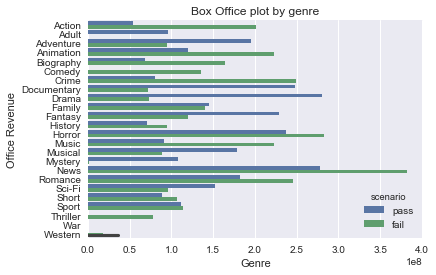

In [97]:
theData = pd.DataFrame({"genre": genres, "scenario": scenarios, "revenue": revenues}) 
    
ax = sns.barplot(x="revenue", y="genre", hue='scenario', data=theData, orient='h')
ax.set_ylabel("Office Revenue")
ax.set_xlabel("Genre")
ax.set_title("Box Office plot by genre")

In [77]:
for genre in passGenreDict:
    genreX.append(genre)                              
    genreY.append(len(passGenreDict[genre]))

for genre in failGenreDict:
    failGenreX.append(genre)                 
    failGenreY.append(len(failGenreDict[genre]))

In [87]:
genres = []
scenarios = []
revenues = []
genreX.sort()
failGenreX.sort()

for i in range(len(genreX)):
   genres.append(genreX[i])
   if (i >= len(failGenreX)):
       genres.append(genreX[i])
   else:
       genres.append(failGenreX[i])
        
   scenarios.append("pass")
   scenarios.append("fail")
   
   yPass = 0.0
   yFail = 0.0
   if (pd.isnull(genreY[i])):
      genreY[i] = 0.0
   
   yPass = genreY[i]
   if (i < len(failGenreY) and pd.notnull(failGenreY[i])):
       yFail = failGenreY[i]
        
   #add some fudge to avoid division by zero errors     
   yTotal = yPass + yFail + .00001    
   revenues.append(yPass/yTotal)
   revenues.append(yFail/yTotal)

In [88]:
print(genreX)
print(failGenreX)

['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']
['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']


In [73]:
print(theData)

           genre   revenue scenario
0          Drama  0.212425     pass
1         Action  0.787575     fail
2         Horror  0.503499     pass
3          Crime  0.496501     fail
4         Sci-Fi  0.466290     pass
5        Fantasy  0.533710     fail
6       Thriller  0.422026     pass
7         Sci-Fi  0.577974     fail
8         Comedy  0.333372     pass
9       Thriller  0.666628     fail
10   Documentary  0.000384     pass
11     Adventure  0.999616     fail
12       Romance  0.528741     pass
13         Drama  0.471259     fail
14        Family  0.771651     pass
15        Horror  0.228349     fail
16     Animation  0.667047     pass
17       Mystery  0.332953     fail
18       Musical  0.547325     pass
19        Comedy  0.452675     fail
20       Fantasy  0.708037     pass
21       Romance  0.291963     fail
22         Music  0.199271     pass
23        Family  0.800729     fail
24        Action  0.515261     pass
25       Western  0.484739     fail
26         Crime  0.506684  

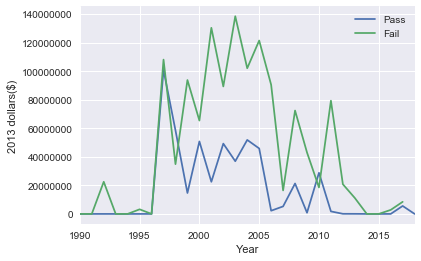

In [49]:
ax = passHollywood.groupby(['Year'])['adjusted_box_office'].median().plot()
failHollywood.groupby(['Year'])['adjusted_box_office'].median().plot()
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.legend(['Pass', 'Fail'])

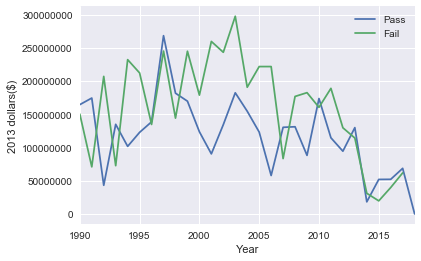

In [59]:
ax = passHollywood.groupby(['Year'])['adjusted_box_office'].mean().plot()
failHollywood.groupby(['Year'])['adjusted_box_office'].mean().plot()
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.legend(['Pass', 'Fail'])

In [ ]:
#Hmm the dips in the data seem interesting. Otherwise the trend is for Fail to be much higher.

In [ ]:
#Plot 4: median vs mean box office revenue
#Gaps are higher for median box office revenue

In [99]:
#Analysis of genre trends for ones where it matters
#which genres will we look at: Adventure, Sci-Fi, Drama, Fantasy, Musical
genreDict = defaultdict(list)
for i in range(len(revenueHollywoodDataset)):
    print(i)
    if (type(revenueHollywoodDataset.iloc[i]['genres']) is str):
      genres = revenueHollywoodDataset.iloc[i]['genres'].split('||')
      for genre in genres:
        genreDict[genre].append(revenueHollywoodDataset.iloc[i]['binary'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644


In [102]:
genreX = []
genreY = []
for genre in genreDict:
    genreX.append(genre)
    passNum = 0.0
    genreLen = len(genreDict[genre])
    for word in genreDict[genre]:
        if (word == 1):
            passNum += 1.0
    genreY.append(passNum/(1.0 * genreLen))
    

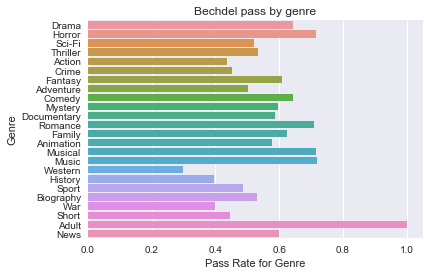

In [104]:
genreDataset = {'genre': genreX, 'pass rate': genreY}
ax = sns.barplot(x="pass rate", y="genre", data=genreDataset, orient="h")
ax.set_xlabel("Pass Rate for Genre")
ax.set_ylabel("Genre")
ax.set_title("Bechdel pass by genre")

In [ ]:
#International and domestic splits
genreDict = defaultdict(list)
for i in range(len(revenueHollywoodDataset)):
    print(i)
    if (type(revenueHollywoodDataset.iloc[i]['genres']) is str):
      genres = revenueHollywoodDataset.iloc[i]['genres'].split('||')
      for genre in genres:
        genreDict[genre].append(revenueHollywoodDataset.iloc[i]['binary'])

In [ ]:
#How it relates to the budget

In [ ]:
#Hypothesis test for a genre thrown in as well